In [1]:
exec(open("init_notebook.py").read())

current working dirC:\Users\abjaw\Documents\GitHub\junction-art


In [2]:
import pyodrx, extensions
from library.Configuration import Configuration
import numpy as np
from junctions.RoadBuilder import RoadBuilder
from junctions.JunctionBuilder import JunctionBuilder
from junctions.AngleCurvatureMap import AngleCurvatureMap
from junctions.StandardCurveTypes import StandardCurveTypes
from junctions.StraightRoadBuilder import StraightRoadBuilder
import math

In [3]:
roadBuilder = RoadBuilder()
straightRoadBuilder = StraightRoadBuilder()
junctionBuilder = JunctionBuilder()
configuration = Configuration()
angleCurvatureMap = AngleCurvatureMap()
esminiPath = configuration.get("esminipath")

{'test': 'This is nothing', 'test2': {'test22': 'this is something'}, 'esminipath': 'C:\\Users\\abjaw\\Documents\\GitHub\\esmini', 'rootPath': 'C:\\Users\\abjaw\\Documents\\GitHub\\junction-art'}


ERROR:root:The road object do not have extended lanes properties. Please, update your code.


starting adjustment. May freeze!!!!!!!!!!!!!
start points starting
C:\Users\abjaw\Documents\GitHub\esmini\bin\odrplot.exe C:/Users/abjaw/Documents/GitHub/esmini/bin/pythonroad.xodr


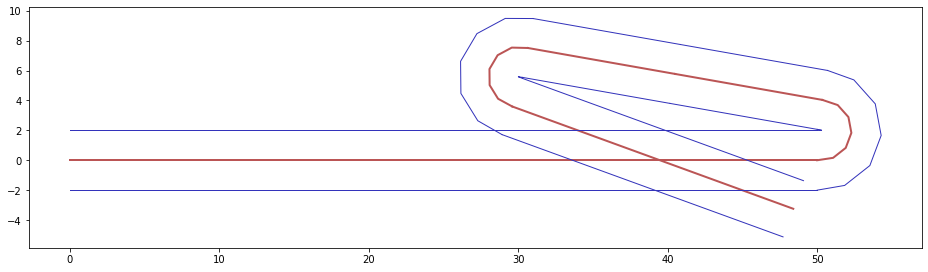

In [4]:
angle = 10
numberofLanes = 4
laneOffset = 4
curve, angle = angleCurvatureMap.getCurvatureForNonOverlappingRoads(angle, numberofLanes, laneOffset)
roads = []
#creating roads
roads.append(straightRoadBuilder.create(roadId=0, 
                                        length=50,
                                        n_lanes=numberofLanes, 
                                        lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(connectionRoadId=1,
                                                                             angleBetweenEndpoints=angle,
                                                                             isJunction=False, 
                                                                             curvature=curve, 
                                                                             _lane_offset=laneOffset, 
                                                                             _n_lanes=numberofLanes))
roads.append(straightRoadBuilder.create(roadId=2, 
                                        length=10,
                                        n_lanes=numberofLanes, 
                                        lane_offset=laneOffset))

roads.append(straightRoadBuilder.create(roadId=3, 
                                        length=10,
                                        n_lanes=numberofLanes, 
                                        lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(connectionRoadId=4,
                                                                             angleBetweenEndpoints=angle,
                                                                             isJunction=False, 
                                                                             curvature=curve, 
                                                                             _lane_offset=laneOffset, 
                                                                             _n_lanes=numberofLanes))
roads.append(straightRoadBuilder.create(roadId=5, 
                                        length=20,
                                        n_lanes=numberofLanes, 
                                        lane_offset=laneOffset))

#setting successor and predecessor
roads[0].add_successor(pyodrx.ElementType.road,1,pyodrx.ContactPoint.start)
roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)

roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.start)
roads[2].add_predecessor(pyodrx.ElementType.road,1,pyodrx.ContactPoint.end)

roads[2].add_successor(pyodrx.ElementType.road,3,pyodrx.ContactPoint.start)
roads[3].add_predecessor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.end)

roads[3].add_successor(pyodrx.ElementType.road,4,pyodrx.ContactPoint.start)
roads[4].add_predecessor(pyodrx.ElementType.road,3,pyodrx.ContactPoint.end)

roads[4].add_successor(pyodrx.ElementType.road,5,pyodrx.ContactPoint.start)
roads[5].add_predecessor(pyodrx.ElementType.road,4,pyodrx.ContactPoint.end)


odrName="intersection_test"
odr=extensions.createOdr(odrName, roads, [])
extensions.view_road(odr, esminiPath)

In [18]:
for r in roads:
    if r.curveType == StandardCurveTypes.LongArc:
        for geom in r.planview._adjusted_geometries:
            print(geom.geom_type)
            print(geom.get_attributes())
            print(geom.get_end_data())
            print(geom.get_start_data())
            

{'s': '0', 'x': '50.0', 'y': '0.0', 'hdg': '0', 'length': '4.153883619746505'}
(54.14475080982829, 0.20509099262032104, 0.14835298849645986, 4.153883619746505)
(54.12953867859841, -0.4097949399223684, -0.1483529884964598, 4.153883619746505)
{'s': '4.153883619746505', 'x': '54.14475080982829', 'y': '0.20509099262032104', 'hdg': '0.14835298849645986', 'length': '37.38495257771854'}
(56.51768418735264, 27.32784425750239, 2.8187067440477844, 37.38495257771854)
(64.34392399802597, -25.0387483302519, -2.5220007670548648, 37.38495257771854)
{'s': '41.538836197465045', 'x': '56.51768418735264', 'y': '27.32784425750239', 'hdg': '2.8187067440477844', 'length': '4.153883619746505'}
(52.471515128825885, 28.249547865310753, 2.9670597325442443, 4.153883619746505)
(52.65219527326716, 28.83748562084286, 2.6703537555513246, 4.153883619746505)
{'s': '0', 'x': '32.77536005415543', 'y': '31.72251133683382', 'hdg': '2.9670597325442443', 'length': '4.153883619746505'}
(28.657963643057794, 32.24026454513539,

In [14]:
def perp(a):
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def seg_intersect(a1,a2, b1,b2):
    da = [a2[0]-a1[0], a2[1]-a1[1]]
    db = [b2[0]-b1[0], b2[1]-b1[1]]
    dp = [a1[0]-b1[0], a1[1]-b1[1]]
    dap = perp(da)
    denom = np.dot( dap, db)
    num = np.dot( dap, dp )
    return (num / denom.astype(float))*db[0] + b1[0], (num / denom.astype(float))*db[1] + b1[1]

In [26]:
def isCollidingRoad(road1, road2):
#     print(road1.curveType)
#     print(road2.curveType)
    if road1.curveType == StandardCurveTypes.LongArc and road2.curveType == StandardCurveTypes.Line:
        for geom in road1.planview._adjusted_geometries:
            p1, p2, p3, p4 = [[], []], [[], []], [[], []], [[], []]

In [27]:
isCollidingRoad(roads[1], roads[0])

StandardCurveTypes.LongArc
StandardCurveTypes.Line
long arc and line


In [ ]:
#creating roads

angle = 10
numberofLanes = 1
laneOffset = 10
curve, angle = angleCurvatureMap.getCurvatureForNonOverlappingRoads(angle, numberofLanes, laneOffset)
roads = []
roads.append(pyodrx.create_straight_road(0, 50,  n_lanes=numberofLanes, lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(1, angle, False, curvature = curve, _n_lanes = numberofLanes, _lane_offset=laneOffset))
roads.append(pyodrx.create_straight_road(2, 50, n_lanes=numberofLanes, lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(3, angle, False, curvature = curve, _n_lanes = numberofLanes, _lane_offset=laneOffset))
roads.append(pyodrx.create_straight_road(4, 70, n_lanes=numberofLanes, lane_offset=laneOffset))
roads.append(roadBuilder.createSimpleCurveWithLongArcWithLaneNumberandOffset(5, angle, False, curvature = curve, _n_lanes = numberofLanes, _lane_offset=laneOffset))
roads.append(pyodrx.create_straight_road(6, 50, n_lanes=numberofLanes, lane_offset=laneOffset))


roads[0].add_successor(pyodrx.ElementType.road,1,pyodrx.ContactPoint.start)

roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)
roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.start)

roads[2].add_predecessor(pyodrx.ElementType.road,1,pyodrx.ContactPoint.end)
roads[2].add_successor(pyodrx.ElementType.road,3,pyodrx.ContactPoint.start)

roads[3].add_predecessor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.end)
roads[3].add_successor(pyodrx.ElementType.road,4,pyodrx.ContactPoint.start)

roads[4].add_predecessor(pyodrx.ElementType.road,3,pyodrx.ContactPoint.end)
roads[4].add_successor(pyodrx.ElementType.road,5,pyodrx.ContactPoint.start)

roads[5].add_predecessor(pyodrx.ElementType.road,4,pyodrx.ContactPoint.end)
roads[5].add_successor(pyodrx.ElementType.road,6,pyodrx.ContactPoint.start)

roads[6].add_predecessor(pyodrx.ElementType.road,5,pyodrx.ContactPoint.end)

odrName = "curve_test"

odr = extensions.createOdr(odrName, roads, [])
extensions.view_road(odr, esminiPath)

In [ ]:
#create roads
angle = 45
numberofLanes = 1
laneOffset = 3
curve, angle = angleCurvatureMap.getCurvatureForNonOverlappingRoads(angle, numberofLanes, laneOffset)
roads = []

roads.append(straightRoadBuilder.create(roadId=0, length=20))
roads.append(roadBuilder.createSimpleCurve(connectionRoadId=1,angleBetweenEndpoints=angle,curvature=curve))
roads.append(straightRoadBuilder.create(roadId=2, length=5))
roads.append(roadBuilder.createSimpleCurve(connectionRoadId=3,angleBetweenEndpoints=angle,curvature=curve))
roads.append(straightRoadBuilder.create(roadId=4, length=7))

roads[0].add_successor(pyodrx.ElementType.road,1,pyodrx.ContactPoint.start)
roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)

roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.start)
roads[2].add_predecessor(pyodrx.ElementType.road,1,pyodrx.ContactPoint.end)

roads[2].add_successor(pyodrx.ElementType.road,3,pyodrx.ContactPoint.start)
roads[3].add_predecessor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.end)

roads[3].add_successor(pyodrx.ElementType.road,4,pyodrx.ContactPoint.start)
roads[4].add_predecessor(pyodrx.ElementType.road,3,pyodrx.ContactPoint.end)

odrName="intersection_test"
odr=extensions.createOdr(odrName, roads, [])
extensions.view_road(odr, esminiPath)